In [1]:
import numpy as np

In [2]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [5]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

In [6]:
c = np.array((1,2))

In [7]:
np.column_stack((a,c))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 2

In [10]:
np.c_[np.array([1,2,3]), np.array([4,5,6]), np.array([7,8,9]), np.array([1,2,1])]

array([[1, 4, 7, 1],
       [2, 5, 8, 2],
       [3, 6, 9, 1]])

In [11]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(0, 10, 100)
y = np.cos(x)
z = np.sin(x)

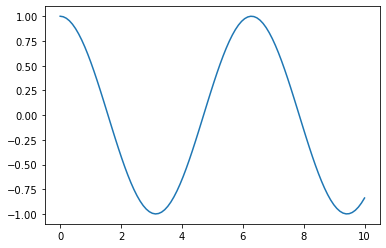

In [14]:
fig, ax = plt.subplots()
lines = ax.plot(x,y)

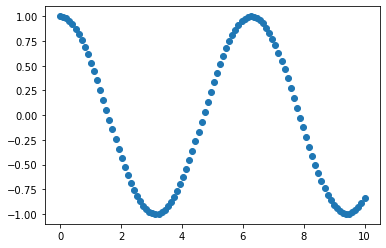

In [19]:
fig, ax = plt.subplots()
scat = ax.scatter(x,y)

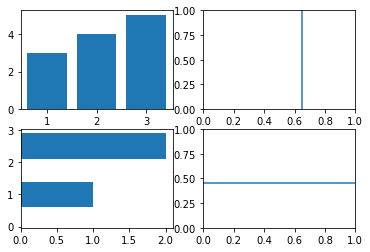

In [25]:
fig3, axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].bar([1,2,3],[3,4,5])
axes[1,0].barh([0.5,1,2.5],[0,1,2])
axes[1,1].axhline(0.45)
axes[0,1].axvline(0.65)

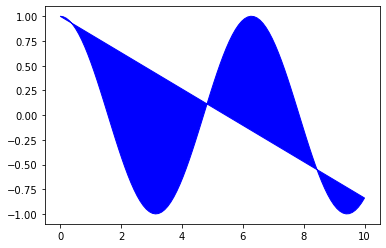

In [27]:
fig, ax = plt.subplots()
ax.fill(x,y,color='blue')

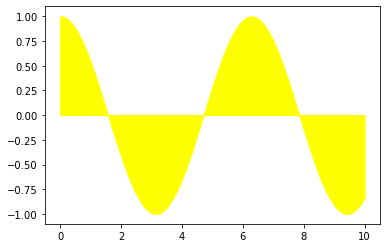

In [29]:
fig, ax = plt.subplots()
ax.fill_between(x,y,color='yellow')

In [31]:
from matplotlib.cbook import get_sample_data
img = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

<ipython-input-31-2bf0a3ca289a>:2: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  img = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))


In [32]:
data = 2 * np.random.random((10, 10))
data2 = 3 * np.random.random((10, 10))
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2

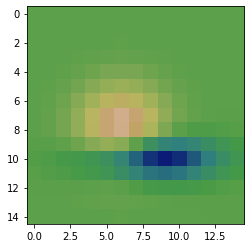

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(img, #Colormapped or RGB arrays
                   cmap='gist_earth',
                   interpolation='nearest',
                   vmin=-2,
                   vmax=2)

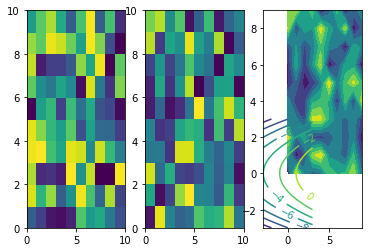

In [39]:
fig4, axes2 = plt.subplots(ncols=3)
axes2[0].pcolor(data2)
axes2[1].pcolormesh(data)
CS = plt.contour(Y,X,U)
axes2[2].contourf(data)
axes2[2]= ax.clabel(CS)

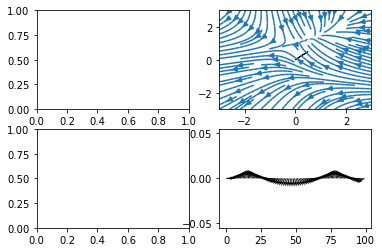

In [42]:
fig3, axes = plt.subplots(nrows=2,ncols=2)
axes[0,1].arrow(0,0,0.5,0.5)
axes[1,1].quiver(y,z)
axes[0,1].streamplot(X,Y,U,V)

In [48]:
a = np.arange(10)

In [49]:
np.clip(a, 1, 8)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [50]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
np.clip(a, 1, 8, out=a)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [53]:
a

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [54]:
a = np.arange(10)

In [55]:
np.where(a < 5)

(array([0, 1, 2, 3, 4]),)

In [56]:
a[np.where(a < 5)]

array([0, 1, 2, 3, 4])

In [58]:
np.where(a < 5, a, None)

array([0, 1, 2, 3, 4, None, None, None, None, None], dtype=object)

In [77]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #sk!!!

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Create an array with 3 clusters in 3-dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Standardize the data
X = StandardScaler().fit_transform(X)

# Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


In [78]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x0', y='x1', z='x2', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

In [79]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

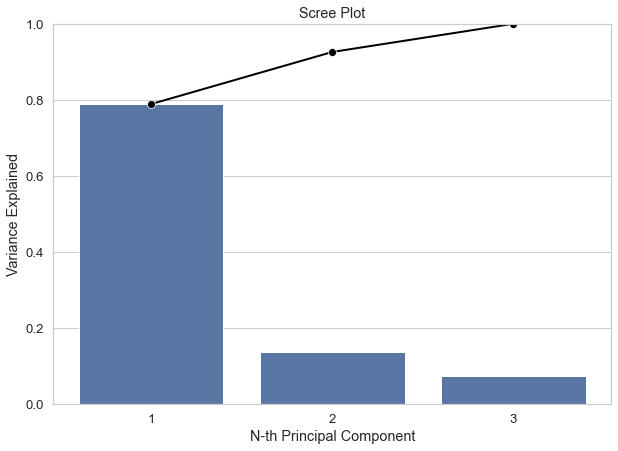

In [80]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

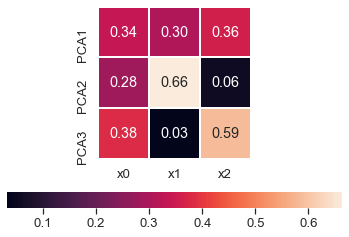

In [81]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [82]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

,PC1,PC2,label
0,1.750435,-0.041716,2
1,2.255957,-0.226133,2
2,-1.058243,0.998596,1
3,-1.165212,-0.799110,0
4,1.478118,-0.034766,2


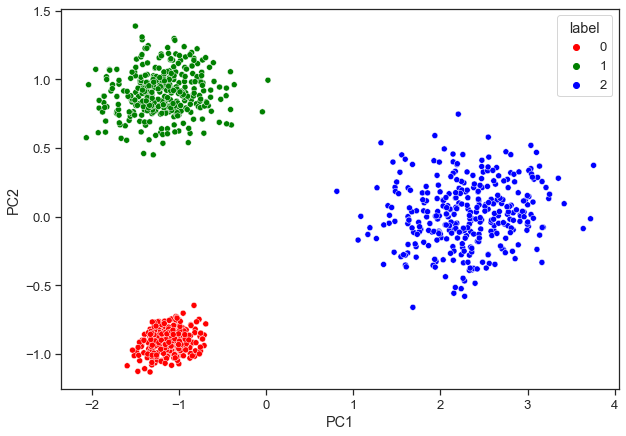

In [74]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])

In [18]:
import numpy as np
import pandas as pd
a = np.array([1,-5,1,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,7])

In [19]:
df = pd.DataFrame(a, columns=['a'])
df.head()

,a
0,1
1,-5
2,1
3,1
4,2


In [20]:
df['bin'] = pd.cut(df['a'],
                   bins=[0, 2, 4, np.inf],
                   labels=[0, 1, 2])

In [21]:
df

,a,bin
0,1,0
1,-5,NaN
2,1,0
3,1,0
4,2,0
5,2,0
6,2,0
7,2,0
8,3,1
9,3,1
